In [1]:
from har_datasets.schema.schema import Config
from hydra import compose, initialize
from omegaconf import OmegaConf
from rich import print
from har_datasets.pipeline.parsing.parsing_uci_har import parse_uci_har
from har_datasets.pipeline.preprocessing.windowing import generate_windows
from har_datasets.pipeline.preprocessing.differentiating import differentiate
from matplotlib import pyplot as plt

In [2]:
from har_datasets.pipeline.dataset.dataset import DatasetHAR


with initialize(version_base=None, config_path="../config"):
    cfg = compose(config_name="cfg")
    cfg = OmegaConf.to_container(cfg, resolve=True)
    cfg = Config(**cfg)  # type: ignore
    # print(cfg)

# dp = UCI_HAR_DataParser(cfg)
# x, y = dp.load_data(cfg.dataset.root_path)
# # dp.load_and_prepare_data()

df = parse_uci_har(cfg.dataset.dir)
# df.to_csv("uci_har.csv", index=True)

dataset = DatasetHAR(cfg, parse_uci_har)

100%|██████████| 400/400 [00:00<00:00, 631.95it/s]


In [ ]:
import torch

loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

In [ ]:
x, y = next(iter(loader))

print(x.shape)

torch.Size([1, 128, 10])

In [3]:
# find where activityblock changes
df[df["activity_block_id"].diff() != 0]

,body_gyro_z_,body_acc_y_,total_acc_z_,body_acc_x_,body_gyro_x_,total_acc_y_,body_gyro_y_,total_acc_x_,body_acc_z_,subj_id,activity_id,activity_name,activity_block_id
0,0.022859,0.010767,0.102934,0.000181,0.030191,-0.123217,0.066014,1.012817,0.055561,1,0,STANDING,1
1728,-0.115422,0.349161,0.395003,-0.088855,0.058535,0.139843,0.034680,0.906832,0.292041,1,1,SITTING,2
3264,0.347703,0.012345,0.561935,0.071580,0.128631,0.801633,0.037360,0.168456,-0.054746,1,2,LAYING,3
4992,0.278781,-0.076159,-0.057304,0.376798,-0.562411,-0.336767,0.975277,1.387865,-0.015946,1,3,WALKING,4
8000,0.010942,0.053209,-0.039068,-0.215585,0.220267,-0.191011,0.159655,0.791146,0.017880,1,4,WALKING_DOWNSTAIRS,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653504,0.390293,0.039482,-0.050741,0.044167,-0.579826,-0.024067,0.301235,1.062258,0.101322,24,3,WALKING,396
655424,-0.082721,0.061593,-0.032677,-0.150232,-0.640701,-0.088634,0.119602,0.863691,0.077982,24,4,WALKING_DOWNSTAIRS,397
656640,0.319736,-0.195829,-0.426051,0.181133,0.571629,-0.328381,-0.234261,1.180778,-0.227867,24,5,WALKING_UPSTAIRS,398
657920,-0.039017,0.060372,-0.026120,-0.237201,-1.286000,-0.091884,0.276351,0.765539,0.168950,24,4,WALKING_DOWNSTAIRS,399


In [ ]:
wi, windows = generate_windows(
    df, cfg.common.sliding_window.windowsize, cfg.common.sliding_window.displacement
)
windows[0].shape

100%|██████████| 400/400 [00:00<00:00, 814.11it/s]


(128, 9)

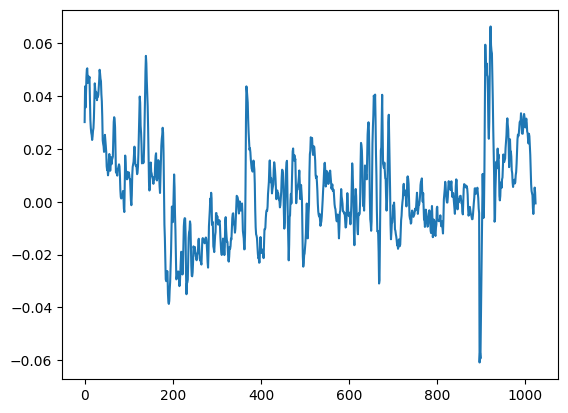

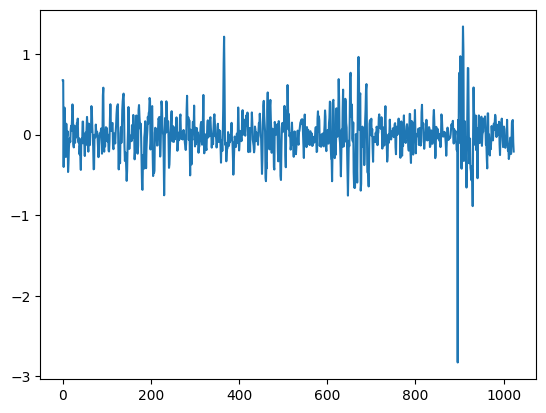

In [5]:
plt.plot(df["body_gyro_x_"][0:1024])
plt.show()

diff_df = differentiate(df)
plt.plot(diff_df["diff_body_gyro_x_"][0:1024])


In [ ]:
windows = generate_windows(
    df, cfg.common.sliding_window.windowsize, cfg.common.sliding_window.displacement
)

# plot first 3 windows
for window in windows[0:3]:
    # print(window.head(128))
    plt.plot(window["body_gyro_x_"])
    # plt.show()

100%|██████████| 400/400 [00:00<00:00, 719.32it/s]


KeyError: 'body_gyro_x_'

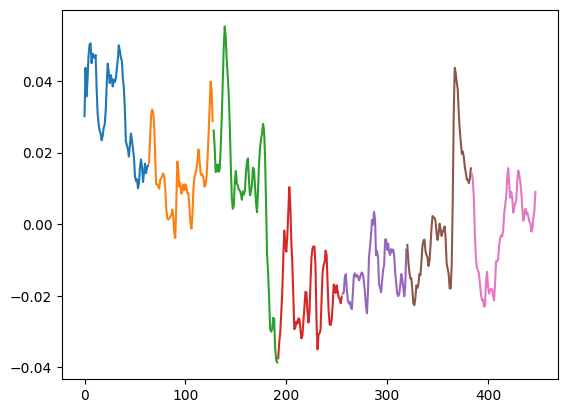

In [7]:
# show row 64 till 128
plt.plot(df["body_gyro_x_"][0:64])
plt.plot(df["body_gyro_x_"][64:128])
plt.plot(df["body_gyro_x_"][128:192])
plt.plot(df["body_gyro_x_"][192:256])
plt.plot(df["body_gyro_x_"][256:320])
plt.plot(df["body_gyro_x_"][320:384])
plt.plot(df["body_gyro_x_"][384:448])

,body_gyro_z_,body_acc_y_,total_acc_z_,body_acc_x_,body_gyro_x_,total_acc_y_,body_gyro_y_,total_acc_x_,body_acc_z_,subj_id,activity_id,activity_block
0,0.022859,0.010767,0.102934,0.000181,0.030191,-0.123217,0.066014,1.012817,0.055561,1,5,1
1728,-0.115422,0.349161,0.395003,-0.088855,0.058535,0.139843,0.034680,0.906832,0.292041,1,4,2
3264,0.347703,0.012345,0.561935,0.071580,0.128631,0.801633,0.037360,0.168456,-0.054746,1,6,3
4992,0.278781,-0.076159,-0.057304,0.376798,-0.562411,-0.336767,0.975277,1.387865,-0.015946,1,1,4
8000,0.010942,0.053209,-0.039068,-0.215585,0.220267,-0.191011,0.159655,0.791146,0.017880,1,3,5
9600,0.032314,-0.052604,-0.001156,-0.088820,0.379767,-0.282266,0.691620,0.925337,0.108979,1,2,6
11264,-0.146974,-0.017649,0.011664,-0.023750,0.114774,-0.335639,0.158483,0.987178,0.065317,1,5,7
12928,0.163498,0.230325,0.339545,-0.059090,0.018952,0.330219,-0.169611,0.882756,0.018095,1,4,8
13632,0.360814,0.012255,0.491256,0.000458,0.035761,0.813487,0.022902,0.262060,-0.053278,1,6,9
14400,-0.264149,0.010589,0.239950,0.026508,-0.423545,0.123346,0.092697,0.945124,-0.117121,1,4,10


In [9]:
# print head of df where subject is 1 and activity is 3
df[(df["subj_id"] == 1) & (df["activity_id"] == 3)].head()

,body_gyro_z_,body_acc_y_,total_acc_z_,body_acc_x_,body_gyro_x_,total_acc_y_,body_gyro_y_,total_acc_x_,body_acc_z_,subj_id,activity_id,activity_block
8000,0.010942,0.053209,-0.039068,-0.215585,0.220267,-0.191011,0.159655,0.791146,0.017880,1,3,5
8001,0.025474,-0.015131,-0.077890,-0.207075,0.332238,-0.259674,0.281223,0.799358,-0.021877,1,3,5
8002,0.010922,-0.025387,-0.055942,-0.182138,0.442019,-0.270252,0.337965,0.823936,-0.000830,1,3,5
8003,0.017764,0.013464,-0.057184,-0.142741,0.482414,-0.231723,0.239022,0.862911,-0.002942,1,3,5
8004,0.030488,0.042464,-0.081386,-0.132632,0.470216,-0.203043,0.122146,0.872531,-0.027978,1,3,5
